In [3]:
import sys, io
import math
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from fractions import Fraction
from sympy import factorint
from itertools import product, combinations
from typing import List, Optional, Tuple
import random
import matplotlib.pyplot as plt


In [4]:
A092893_tups = [(4, 1, 3),
(8, 2, 13),
(10, 3, 17),
(11, 4, 11),
(12, 5, 7),
(13, 6, 9),
(16, 7, 25),
(18, 8, 33),
(20, 9, 43),
(22, 10, 57),
(23, 11, 39),
(26, 12, 105),
(28, 13, 135),
(30, 14, 185),
(31, 15, 123),
(33, 16, 169),
(35, 17, 219),
(36, 18, 159),
(39, 19, 379),
(40, 20, 283),
(42, 21, 377),
(43, 22, 251),
(44, 23, 167),
(45, 24, 111),
(48, 25, 297),
(50, 26, 395),
(51, 27, 263),
(52, 28, 175),
(54, 29, 233),
(55, 30, 155),
(56, 31, 103),
(58, 32, 137),
(59, 33, 91),
(61, 34, 121),
(63, 35, 161),
(64, 36, 107),
(65, 37, 71),
(66, 38, 47),
(67, 39, 31),
(69, 40, 41),
(70, 41, 27),
(73, 42, 73),
(75, 43, 97),
(77, 44, 129),
(79, 45, 171),
(81, 46, 231),
(83, 47, 313),
(85, 48, 411),
(87, 49, 543),
(89, 50, 731),
(90, 51, 487),
(91, 52, 327),
(94, 53, 859),
(96, 54, 1145),
(97, 55, 763),
(99, 56, 1017),
(101, 57, 1351),
(103, 58, 1801),
(104, 59, 1215),
(106, 60, 1583),
(107, 61, 1055),
(108, 62, 703),
(110, 63, 937),
(112, 64, 1249),
(113, 65, 871),
(115, 66, 1161),
(118, 67, 3097),
(120, 68, 3947),
(121, 69, 2631),
(123, 70, 3567),
(125, 71, 4763),
(126, 72, 3175),
(128, 73, 4233),
(130, 74, 5543),
(131, 75, 3695),
(132, 76, 2463),
(135, 77, 6569),
(136, 78, 4379),
(137, 79, 2919),
(140, 80, 7785),
(142, 81, 10087),
(143, 82, 6919),
(145, 83, 9225),
(147, 84, 12527),
(148, 85, 8351),
(149, 86, 5567),
(150, 87, 3711),
(153, 88, 9887),
(154, 89, 6591),
(156, 90, 8959),
(158, 91, 11945),
(159, 92, 7963),
(161, 93, 10415),
(162, 94, 6943),
(164, 95, 9257),
(165, 96, 6171),
(168, 97, 16457),
(169, 98, 10971),
(171, 99, 14695),
(173, 100, 19593),
(174, 101, 13255),
(176, 102, 17647),
(178, 103, 23529),
(180, 104, 31419),
(182, 105, 40959),
(184, 106, 56487),
(186, 107, 73063),
(187, 108, 48927),
(189, 109, 64255),
(191, 110, 84383),
(192, 111, 56255),
(193, 112, 37503),
(194, 113, 26623),
(196, 114, 34239),
(198, 115, 45127),
(200, 116, 60169),
(202, 117, 80225),
(203, 118, 53483),
(204, 119, 35655),
(207, 120, 95081),
(208, 121, 63387),
(210, 122, 87087),
(211, 123, 60975),
(213, 124, 78791),
(214, 125, 52527),
(217, 126, 129991),
(219, 127, 173321),
(220, 128, 115547),
(221, 129, 77031),
(223, 130, 106239),
(225, 131, 146599),
(227, 132, 189855),
(229, 133, 254911),
(230, 134, 180463),
(232, 135, 225023),
(233, 136, 150015),
(235, 137, 206847),
(236, 138, 142587),
(239, 139, 351359),
(240, 140, 234239),
(241, 141, 156159),
(243, 142, 216367),
(245, 143, 277615),
(247, 144, 370153),
(249, 145, 493537),
(251, 146, 658049),
(252, 147, 438699),
(254, 148, 591983),
(255, 149, 394655),
(256, 150, 263103),
(258, 151, 360361),
(260, 152, 467739),
(262, 153, 635519),
(263, 154, 423679),
(265, 155, 554143),
(266, 156, 376603),
(268, 157, 492571),
(270, 158, 656761),
(272, 159, 871915),
(273, 160, 583787),
(274, 161, 389191),
(276, 162, 518921),
(277, 163, 345947),
(278, 164, 230631),
(281, 165, 615017),
(282, 166, 410011),
(284, 167, 546681),
(287, 168, 1431979),
(288, 169, 970599),
(290, 170, 1290267),
(292, 171, 1727783),
(293, 172, 1151855),
(294, 173, 767903),
(295, 174, 511935),
(298, 175, 1365161),
(299, 176, 910107),
(302, 177, 2416521),
(304, 178, 3216799),
(305, 179, 2157291),
(306, 180, 1504895),
(307, 181, 1003263),
(309, 182, 1302127),
(311, 183, 1676703),
(313, 184, 2270335),
(314, 185, 1585403),
(315, 186, 1056935),
(316, 187, 704623),
(318, 188, 939497),
(319, 189, 626331),
(322, 190, 1590511),
(324, 191, 2120681),
(325, 192, 1413787),
(327, 193, 1885049),
(328, 194, 1256699),
(329, 195, 837799),
(331, 196, 1117065),
(333, 197, 1501353),
(335, 198, 1993215),
(338, 199, 5315241),
(339, 200, 3558763),
(341, 201, 4599551),
(342, 202, 3066367),
(344, 203, 4088489),
(345, 204, 2725659),
(347, 205, 3877919),
(348, 206, 2585279),
(349, 207, 1723519),
(351, 208, 2298025),
(353, 209, 3064033),
(355, 210, 4063723),
(357, 211, 5217727),
(359, 212, 6956969),
(360, 213, 4637979),
(362, 214, 5978623),
(364, 215, 7971497),
(365, 216, 5314331),
(366, 217, 3542887),
(368, 218, 4723849),
(370, 219, 6298465),
(372, 220, 8397953),
(373, 221, 5598635),
(374, 222, 3732423),
(377, 223, 9953129),
(378, 224, 6635419),
(380, 225, 8847225),
(381, 226, 6355687),
(383, 227, 8474249),
(384, 228, 5649499),
(386, 229, 7332399),
(388, 230, 10011263),
(389, 231, 6674175),
(392, 232, 17337001),
(394, 233, 22923375),
(395, 234, 15410667),
(397, 235, 21093689),
(398, 236, 14062459),
(400, 237, 18749945),
(401, 238, 12499963),
(403, 239, 16666617),
(406, 240, 44444313),
(408, 241, 56804591),
(409, 242, 37869727),
(411, 243, 50492969),
(412, 244, 33661979),
(413, 245, 22441319),
(414, 246, 14960879),
(415, 247, 9973919),
(416, 248, 6649279),
(418, 249, 8865705),
(421, 250, 23456487),
(422, 251, 15761255),
(423, 252, 10507503),
(426, 253, 28020007),
(427, 254, 18901151),
(428, 255, 12600767),
(429, 256, 8400511),
(431, 257, 11200681),
(433, 258, 14934241),
(435, 259, 19912321),
(437, 260, 26549761),
(439, 261, 35399681),
(440, 262, 23599787),
(441, 263, 15733191),
(444, 264, 41464303)               
]

In [5]:
X = []
Y = []
for tup in A092893_tups:
    X.append(tup[1])
    Y.append(tup[1]/tup[0])

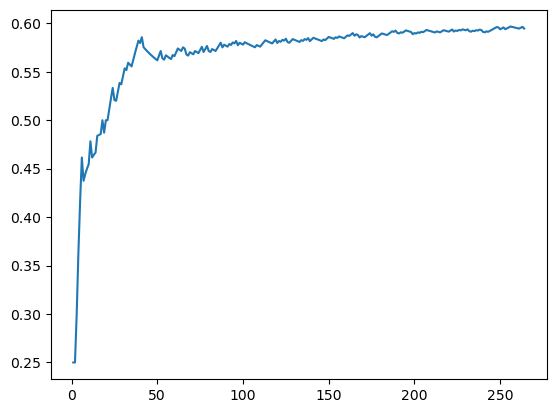

In [6]:
plt.plot(X, Y)
plt.show()

In [7]:
for tup in A092893_tups:
    print(f"{tup[1]}\t{tup[1]/tup[0]}")


1	0.25
2	0.25
3	0.3
4	0.36363636363636365
5	0.4166666666666667
6	0.46153846153846156
7	0.4375
8	0.4444444444444444
9	0.45
10	0.45454545454545453
11	0.4782608695652174
12	0.46153846153846156
13	0.4642857142857143
14	0.4666666666666667
15	0.4838709677419355
16	0.48484848484848486
17	0.4857142857142857
18	0.5
19	0.48717948717948717
20	0.5
21	0.5
22	0.5116279069767442
23	0.5227272727272727
24	0.5333333333333333
25	0.5208333333333334
26	0.52
27	0.5294117647058824
28	0.5384615384615384
29	0.5370370370370371
30	0.5454545454545454
31	0.5535714285714286
32	0.5517241379310345
33	0.559322033898305
34	0.5573770491803278
35	0.5555555555555556
36	0.5625
37	0.5692307692307692
38	0.5757575757575758
39	0.582089552238806
40	0.5797101449275363
41	0.5857142857142857
42	0.5753424657534246
43	0.5733333333333334
44	0.5714285714285714
45	0.569620253164557
46	0.5679012345679012
47	0.5662650602409639
48	0.5647058823529412
49	0.5632183908045977
50	0.5617977528089888
51	0.5666666666666667
52	0.5714285714285714
53

In [8]:
f = Fraction(0.5925)
f.numerator, f.denominator

(2668382779217019, 4503599627370496)

In [9]:
print("A092893 = [")
for tup in A092893_tups:
    print(f"{tup[2]},")
print("]")

A092893 = [
3,
13,
17,
11,
7,
9,
25,
33,
43,
57,
39,
105,
135,
185,
123,
169,
219,
159,
379,
283,
377,
251,
167,
111,
297,
395,
263,
175,
233,
155,
103,
137,
91,
121,
161,
107,
71,
47,
31,
41,
27,
73,
97,
129,
171,
231,
313,
411,
543,
731,
487,
327,
859,
1145,
763,
1017,
1351,
1801,
1215,
1583,
1055,
703,
937,
1249,
871,
1161,
3097,
3947,
2631,
3567,
4763,
3175,
4233,
5543,
3695,
2463,
6569,
4379,
2919,
7785,
10087,
6919,
9225,
12527,
8351,
5567,
3711,
9887,
6591,
8959,
11945,
7963,
10415,
6943,
9257,
6171,
16457,
10971,
14695,
19593,
13255,
17647,
23529,
31419,
40959,
56487,
73063,
48927,
64255,
84383,
56255,
37503,
26623,
34239,
45127,
60169,
80225,
53483,
35655,
95081,
63387,
87087,
60975,
78791,
52527,
129991,
173321,
115547,
77031,
106239,
146599,
189855,
254911,
180463,
225023,
150015,
206847,
142587,
351359,
234239,
156159,
216367,
277615,
370153,
493537,
658049,
438699,
591983,
394655,
263103,
360361,
467739,
635519,
423679,
554143,
376603,
492571,
656761,
871915,
583787,
38919